<a href="https://colab.research.google.com/github/Kim-Hyerin/pdm06/blob/master/py-tensorflow/tf2_3_mnist_NN_best_pdm06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Keras example: mnist analysisby simple NN (Neural network)

- Keras was designed to easily use the famous deep-learning frameworks; tensorflow, tenano. 
- Keras provides an easy and convenient way to build deep learning models.

    - Keras is an open source python library that enables you to easily build Deep Neural Networks. 
    - This library is implemented in TensorFlow 2.0.
    - Tensorflow and Pytorch are the most used numerical platforms in Python to build Deep Learning algorithms.


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

2.3.0


In [2]:
%%time
from keras.datasets import mnist
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step
CPU times: user 311 ms, sys: 55 ms, total: 366 ms
Wall time: 611 ms


In [3]:
print(X_train0.shape, X_train0.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test0.shape, X_test0.dtype)
print(y_test0.shape, y_test0.dtype)

(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


11112


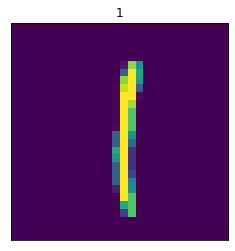

In [4]:
# display one random image from the training set:
class_names = ["0","1","2","3","4","5","6","7","8","9"]

idx = np.random.randint(0, X_train0.shape[0])
print(idx)
image = X_train0[idx]
plt.imshow(image) #, cmap=plt.get_cmap('gray'))
plt.title(class_names[y_train0[idx]])
plt.xticks([])
plt.yticks([])
plt.show()

### Show images of numbers

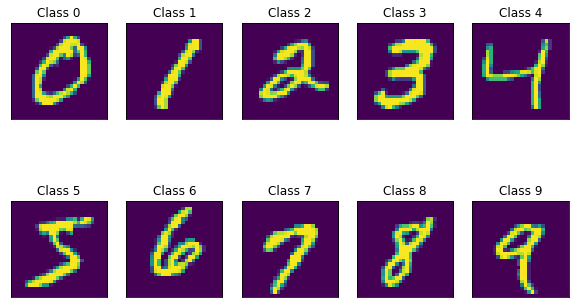

In [6]:
fig = plt.figure(figsize=(10,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    num0_9 = X_train0[y_train0 == i]
    # print(num0_9.shape)
    plt.imshow(num0_9[0]) #, cmap='gray') #, interpolation='none')
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])


### 데이터를 float 타입으로 바꾸고 스케일링한다.
- 2차원 영상을 1차원 벡터로 변환
- (28,28) => (784,)
- Scaling: (0 ~ 255)/255.0

In [7]:
X_train = X_train0.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test0.reshape(10000, 784).astype('float32') / 255.0
print(X_train.shape, X_train.dtype)
print(X_test.shape, X_test.dtype)

(60000, 784) float32
(10000, 784) float32


In [8]:
print(X_train0.shape, X_train.shape)

(60000, 28, 28) (60000, 784)


### y 데이터는 One-Hot-Encoding 을 한다.

In [9]:
y_train0[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [10]:
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from keras.utils import to_categorical

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

> One-Hot-Encoding을 하는 이유
- 머신러닝의 목표가 특정 숫자 그림의 숫자를 정확하게 맞추는 것이 아니다.
    1. 일단, 0에서 9까지의 숫자로 판단될 10개의 확률을 계산한다.
    2. 그리고 특정 숫자로 판단될 확률이 제일 큰 수로 결정한다.
- 3개 이상의 클래스를 구분하는 지도학습의 경우 One-Hot-Encoding은 필요한 과정이다.



---



---



# 신경망 (Neural network)

## 신경망 구현 순서

### Keras 를 사용하면 다음과 같은 순서로 신경망을 구성할 수 있다.

1. **모형 객체 생성**, Sequential 모형 클래스 객체 생성
2. **신경망 구성**, layer 추가하여 구성
    - Dense layer 가 가장 일반적인 신경망
    - 입력단부터 순차적으로 추가한다.
    - 레이어는 출력 뉴런 갯수를 첫번째 인수로 받는다.
    - 최초의 레이어는 input_shape 인수로 입력 크기를 설정해야 한다.
    - activation 인수로 activation 함수 설정
3. **compile** 메서드로 모형 완성.
    - loss 인수로 Loss 함수 설정
    - optimizer 인수로 최적화 알고리즘 설정
    - metrics 인수로 트레이닝 단계에서 기록할 성능 기준 설정
4. **fit** 메서드로 트레이닝
    - epochs로 트레이닝 횟수 설정
    - batch_size 로 mini batch size 설정
    - metrics 인수로 설정한 성능 기준 기록을 출력으로 반환

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

## Starting model
> 784개의 입력을 받는 하나의 hidden layer(128 neurons)와 출력레이어(10 neurons)로 구성된 단순한 신경망.
- Dropout

In [13]:
# Configure model
# np.random.seed(0)
tf.random.set_seed(0)

n_filters = 128
model = Sequential()
model.add(Dense(n_filters, input_dim=784, activation="relu"))  # first layer
# relu : 0보다 큰 값만 y=x
model.add(Dropout(0.25))
model.add(Dense(10, activation="softmax")) # output layer

![mnist_NN_2_layers](https://raw.githubusercontent.com/Redwoods/Py/master/pdm2020/my-note/py-tensorflow/images/mnist_NN_2_layers.png)


### Model 정보 및 출력
- summary()
- plot_model()

In [14]:
# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [15]:
# check parameters
28*28*n_filters+n_filters, n_filters*10+10

(100480, 1290)

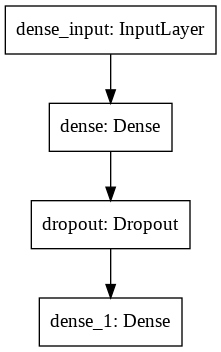

In [16]:
from keras.utils import plot_model
plot_model(model, to_file='best_model.png')

### 모델의 구조 살펴 보기

In [17]:
model

In [18]:
model.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 128,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout',
    'noise_shape': None,
    'rate': 0.25,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'softmax',
    'activity_regularizer': None,
    'bias_constraint': None

In [19]:
l1 = model.layers[0] # hidden layer
l2 = model.layers[2] # output layer

In [20]:
l1, l2

(<tensorflow.python.keras.layers.core.Dense at 0x7f6bf03ce470>,
 <tensorflow.python.keras.layers.core.Dense at 0x7f6bf03cee48>)

In [21]:
l1.name, type(l1), l1.output_shape, l1.activation.__name__, l1.count_params()

('dense',
 tensorflow.python.keras.layers.core.Dense,
 (None, 128),
 'relu',
 100480)

In [22]:
# number of parameters
784*n_filters + n_filters

100480

In [23]:
l2.name, type(l1), l2.output_shape, l2.activation.__name__, l2.count_params()

('dense_1',
 tensorflow.python.keras.layers.core.Dense,
 (None, 10),
 'softmax',
 1290)

In [24]:
# number of parameters
n_filters*10 + 10  

1290

## fit 메서드로 트레이닝

In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# 학습 최적화 함수 : adam 경사하강법

In [26]:
%%time
hist = model.fit(X_train, y_train, 
                 epochs=20, batch_size=100, 
                 validation_data=(X_test, y_test), 
                 verbose=1)


# batch_size: 100 -> 60,000개의 트레이닝 데이터를 100개씩 600묶음으로 나눈 후, 
# 각 묶음에 대하어 forward, back propagation을 실시하면서 파라미터를 조정한다.
# epochs: 전체 600개의 batch에 대하여 다 계산을 수행하면 epoch 1 종료.
# validation_data: 테스트 데이터를 섞어서 검증한다.

Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 0.3875 - accuracy: 0.8892 - val_loss: 0.1758 - val_accuracy: 0.9496
Epoch 2/20
600/600 [==============================] - 1s 2ms/step - loss: 0.1821 - accuracy: 0.9470 - val_loss: 0.1233 - val_accuracy: 0.9633
Epoch 3/20
600/600 [==============================] - 1s 2ms/step - loss: 0.1386 - accuracy: 0.9599 - val_loss: 0.0988 - val_accuracy: 0.9702
Epoch 4/20
600/600 [==============================] - 1s 2ms/step - loss: 0.1159 - accuracy: 0.9654 - val_loss: 0.0942 - val_accuracy: 0.9718
Epoch 5/20
600/600 [==============================] - 1s 2ms/step - loss: 0.1003 - accuracy: 0.9692 - val_loss: 0.0795 - val_accuracy: 0.9760
Epoch 6/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0894 - accuracy: 0.9736 - val_loss: 0.0769 - val_accuracy: 0.9768
Epoch 7/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0788 - accuracy: 0.9759 - val_loss: 0.0694 - val_accuracy: 0.9782
Epoch 

### Plot of performance and accuracy (모델 성능 및 정확도)

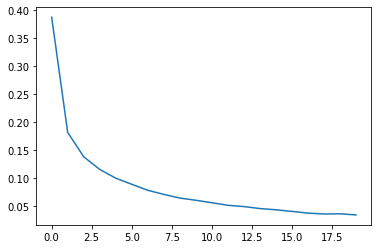

In [27]:
# Plot performance
plt.plot(hist.history['loss'])
plt.show()

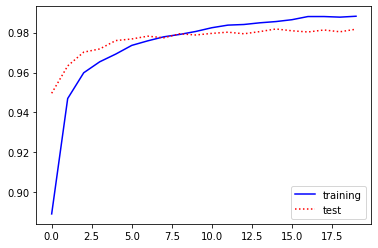

In [28]:
plt.plot(hist.history['accuracy'], 'b-', label="training")
plt.plot(hist.history['val_accuracy'], 'r:', label="test")
plt.legend()
plt.show()

## 가중치 정보

> 트레이닝이 끝난 모형의 가중치 정보는 get_weights 메서드로 구할 수 있다. 이 메서드는 w 값과 b 값을 출력한다.
- w: weights
- b: bias

In [29]:
w1 = l1.get_weights()  # 784*n_filters + n_filters = ?
w1[0].shape, w1[1].shape

((784, 128), (128,))

In [30]:
w2 = l2.get_weights()  # n_filters*10 + 10 = ?
w2[0].shape, w2[1].shape

((128, 10), (10,))

## 모형의 사용

> 트레이닝이 끝난 모형은 predict 메서드로 y 값을 출력하거나 출력된 y값을 각 클래스에 대한 판별함수로 가정하고 predict_classes 메서드로 classification을 할 수 있다.

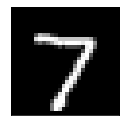

In [31]:
plt.figure(figsize=(2, 2))
plt.imshow(X_test0[0], cmap='gray')
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

In [32]:
X_test[:1, :].shape

(1, 784)

In [33]:
model.predict(X_test[:1, :])  # Probabilitic prediction viq one-hot encoding of labels

array([[2.2779232e-09, 2.9474548e-11, 6.7633316e-08, 3.5783573e-04,
        5.1544794e-14, 1.9715182e-08, 3.1967611e-18, 9.9963748e-01,
        1.4305957e-08, 4.6420046e-06]], dtype=float32)

In [34]:
tf.argmax(model.predict(X_test[:1, :]),axis=1), np.argmax(model.predict(X_test[:1, :]),axis=1)

(<tf.Tensor: shape=(1,), dtype=int64, numpy=array([7])>, array([7]))

### 테스트 데이터에 대한 예측 정확도 계산 

In [35]:
y_pred0 = model.predict(X_test, verbose=1)
y_pred0[:5]

313/313 [==============================] - 0s 1ms/step


array([[2.2779232e-09, 2.9474662e-11, 6.7633451e-08, 3.5783558e-04,
        5.1544794e-14, 1.9715182e-08, 3.1967489e-18, 9.9963748e-01,
        1.4305957e-08, 4.6420046e-06],
       [4.1955393e-12, 5.0454798e-07, 9.9999940e-01, 8.0160270e-08,
        1.6292638e-22, 4.6925216e-08, 3.5607541e-09, 6.0425031e-18,
        5.7999054e-09, 1.2979992e-18],
       [4.3456749e-09, 9.9982917e-01, 4.3786109e-05, 7.7541920e-08,
        6.6468317e-07, 6.3886887e-08, 3.0602163e-07, 1.2239780e-04,
        3.4255950e-06, 1.8038890e-09],
       [9.9994874e-01, 1.3373613e-09, 4.4977394e-05, 8.5108320e-09,
        1.6990695e-08, 1.3141049e-07, 1.3544020e-06, 6.3450031e-08,
        1.5196245e-07, 4.5655738e-06],
       [1.0841081e-07, 2.7697610e-11, 3.4897087e-07, 2.5250031e-09,
        9.9292618e-01, 9.7858042e-09, 1.8026068e-07, 3.9032511e-06,
        6.6583872e-09, 7.0692701e-03]], dtype=float32)

In [36]:
np.argmax(y_pred0[:5],axis=1), y_test0[:5]

(array([7, 2, 1, 0, 4]), array([7, 2, 1, 0, 4], dtype=uint8))

In [37]:
y_pred=np.argmax(y_pred0,axis=1)

In [38]:
t_count = np.sum(y_pred == y_test0) # True positive
f_count = np.sum(y_pred != y_test0) # False positive
f_count==10000-t_count

True

In [39]:
t_count,f_count # 10000개의 테스트 데이터 중 T:9817, F:183

(9817, 183)

In [40]:
accuracy = t_count/10000*100
accuracy # 정확도

98.17

### Accuracy of predicting test numbers is around 98.2% in NN (neural network).
- Best!!

In [41]:
# see which we predicted correctly and which not
correct_indices = np.nonzero(y_pred == y_test0)[0]
incorrect_indices = np.nonzero(y_pred != y_test0)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")


9817  classified correctly
183  classified incorrectly


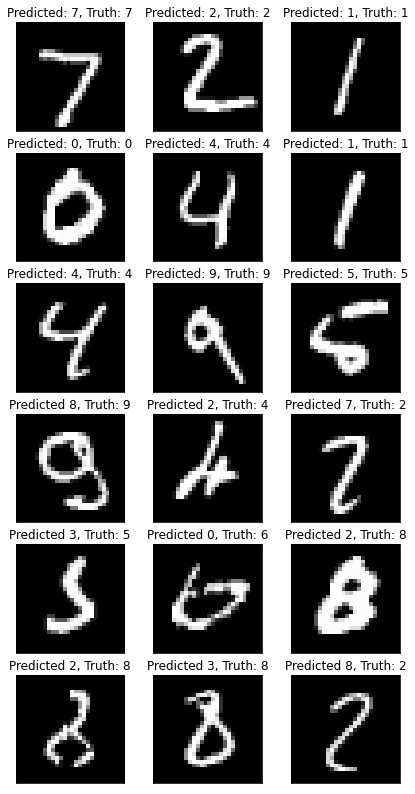

In [42]:
# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(y_pred[correct],
                                        y_test0[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(y_pred[incorrect], 
                                       y_test0[incorrect]))
    plt.xticks([])
    plt.yticks([])

# figure_evaluation

## 모형의 저장

>  트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 hdf5 형식으로 저장하였다가 나중에 load 명령으로 불러 사용할 수 있다.

In [43]:
model.save('model_NN_2layers_best.hdf5')
# del model

In [44]:
from keras.models import load_model

model2 = load_model('model_NN_2layers_best.hdf5')
model2.predict(X_test[:1, :], verbose=0)
np.argmax(model2.predict(X_test[:1, :], verbose=0),axis=1)

array([7])

In [45]:
# Predict of the first 10 test data
np.argmax(model2.predict(X_test[:10, :], verbose=0),axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

### 저장된 모형을 이용하여 테스트 데이터에 대한 예측 정확도 계산 

In [46]:
# Wrong prediction
np.argmax(model2.predict(X_test[8:9, :], verbose=1),axis=1)

1/1 [==============================] - 0s 3ms/step


array([5])

In [47]:
y_test0[8]  # Compare the true value and the prediction.

5

In [48]:
# 전체 테스트 데이터에 대한 예측
x_pred = np.argmax(model2.predict(X_test, verbose=1, batch_size=100), axis=1)

100/100 [==============================] - 0s 1ms/step


In [49]:
t_count = np.sum(x_pred==y_test0) # True positive
f_count = np.sum(x_pred!=y_test0) # False positive
f_count==10000-t_count

True

In [50]:
t_count,f_count

(9817, 183)

In [51]:
accuracy = t_count/10000*100
accuracy

98.17

### 모델 성능 평가
- model.evaluate(X_test, y_test, batch_size)

In [52]:
model.evaluate(X_test, y_test, batch_size=100)

100/100 [==============================] - 0s 2ms/step - loss: 0.0638 - accuracy: 0.9817


[0.06375942379236221, 0.9817000031471252]

In [53]:
model2.evaluate(X_test, y_test, batch_size=100)

100/100 [==============================] - 0s 2ms/step - loss: 0.0638 - accuracy: 0.9817


[0.06375942379236221, 0.9817000031471252]

### Accuracy of predicting test numbers is around 98.2% in the best neural network model.

> How to improve this model to the best model?
- Change loss function
- Change optimizer
- Change activation
- Change the number of neurons 
- Add new layers
- Apply Dropout
- ...



---

